## Document Loading

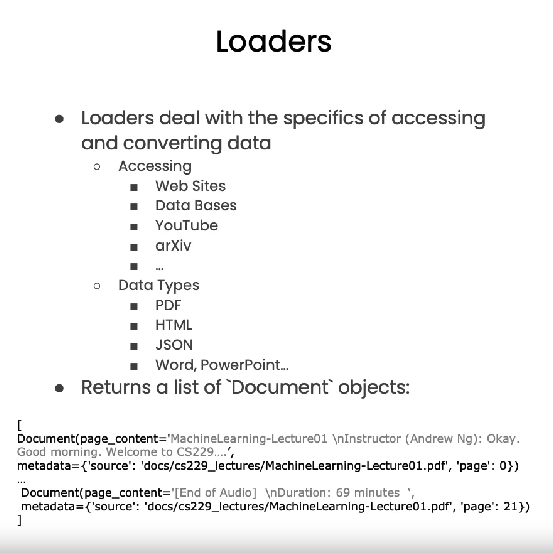

## Retrieval augmented generation
 
In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution. 

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc). 

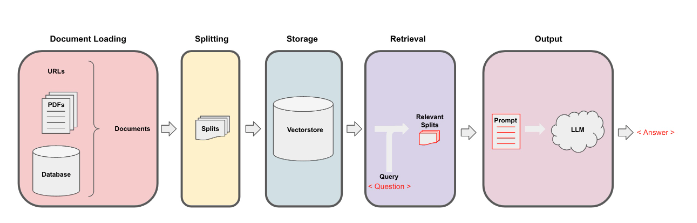

In [1]:
import os
import openai
import sys

sys.path.append('../..')

# from dotenv import load_dotenv, find_dotenv

# _ = load_dotenv(find_dotenv())   # read local .env file

# openai.api_key = os.environ['OPENAI_API_KEY']

openai.api_key = "***********************************"



#### PDFs

In [2]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("docs/Santander-ias-2021-climate-finance-2021-en.pdf")
pages = loader.load()

In [3]:
len(pages)

58

In [4]:
page = pages[0]

In [5]:
print(page.page_content[0:500])

Climate Finance  
Report
2021-June 2022
www.santander.com
Climate Finance 
Report
2021-June 2022
www.santander.com


In [6]:
print(pages[1].page_content[0:5000])

2 
Climate Finance Report  
2021 - June 2022   
Table of contents 
Climate Finance Report 
2021-June 2022 


In [7]:
print(pages[2].page_content[0:5000])

3 
Climate Finance Report  
2021 - June 2022   
 1. Introduction 
The invasion of Ukraine, the energy crisis, 
infation: the world has changed a lot over the last year. But two things have not changed: climate change remains a global emergency, and Santander remains committed to have net zero carbon emissions by 2050. We remain focused on doing all we can to support our customers in an orderly, just transition, working with others – in the Glasgow Financial Alliance for Net Zero (GFANZ), for example – both to cut emissions and to realise the opportunities that transition presents. 
If the transition is to be orderly, we need to 
ensure growth and decarbonization go together, hand in hand. That means accelerating the drive to renewable energy, so that we both cut emissions and improve energy security. It also means reducing the demand for fossil fuels and help people and businesses go green. And we cannot lose sight of other related challenges – such as the need to protect biodiversity,

In [8]:
page.metadata

{'source': 'docs/Santander-ias-2021-climate-finance-2021-en.pdf', 'page': 0}

In [9]:
pages[2].metadata

{'source': 'docs/Santander-ias-2021-climate-finance-2021-en.pdf', 'page': 2}

#### Youtube

In [10]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [19]:
url="https://www.youtube.com/watch?v=u9fhLChk3mE"
save_dir="docs/youtube/"
loader = GenericLoader(YoutubeAudioLoader([url], save_dir), OpenAIWhisperParser())
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=u9fhLChk3mE
[youtube] u9fhLChk3mE: Downloading webpage
[youtube] u9fhLChk3mE: Downloading ios player API JSON
[youtube] u9fhLChk3mE: Downloading android player API JSON
[youtube] u9fhLChk3mE: Downloading m3u8 information
[info] u9fhLChk3mE: Downloading 1 format(s): 140
[download] docs\youtube\The Fastest Way To Become A Machine Learning Engineer.m4a has already been downloaded
[download] 100% of   10.71MiB


ERROR: Postprocessing: ffprobe and ffmpeg not found. Please install or provide the path using --ffmpeg-location


DownloadError: ERROR: Postprocessing: ffprobe and ffmpeg not found. Please install or provide the path using --ffmpeg-location

In [25]:
# docs[0].page_content[0:500]

#### URLs

In [12]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://github.com/imkushwaha/PySpark/blob/main/README.md")

In [13]:
docs = loader.load()

In [14]:
print(docs[0].page_content[:5000])












































































PySpark/README.md at main · imkushwaha/PySpark · GitHub

















































Skip to content







Toggle navigation










            Sign up
          


 













        Product
        












Actions
        Automate any workflow
      







Packages
        Host and manage packages
      







Security
        Find and fix vulnerabilities
      







Codespaces
        Instant dev environments
      







Copilot
        Write better code with AI
      







Code review
        Manage code changes
      







Issues
        Plan and track work
      







Discussions
        Collaborate outside of code
      




Explore



      All features

    



      Documentation

    





      GitHub Skills

    





      Blog

    









        Solutions
        





For



      Enterprise

    



      Teams

    



      Startups

    



   

#### Notion

Follow steps [here](https://python.langchain.com/docs/modules/data_connection/document_loaders/integrations/notion) for an example Notion site such as [this one](https://yolospace.notion.site/Blendle-s-Employee-Handbook-e31bff7da17346ee99f531087d8b133f):

* Duplicate the page into your own Notion space and export as `Markdown / CSV`.
* Unzip it and save it as a folder that contains the markdown file for the Notion page.
 

In [15]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()

In [16]:
print(docs[0].page_content[0:200])

# Blendle's Employee Handbook

This is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that


In [17]:
docs[0].metadata

{'source': "docs\\Notion_DB\\Blendle's Employee Handbook a53b67b938384e77815115b4e6625ee3.md"}

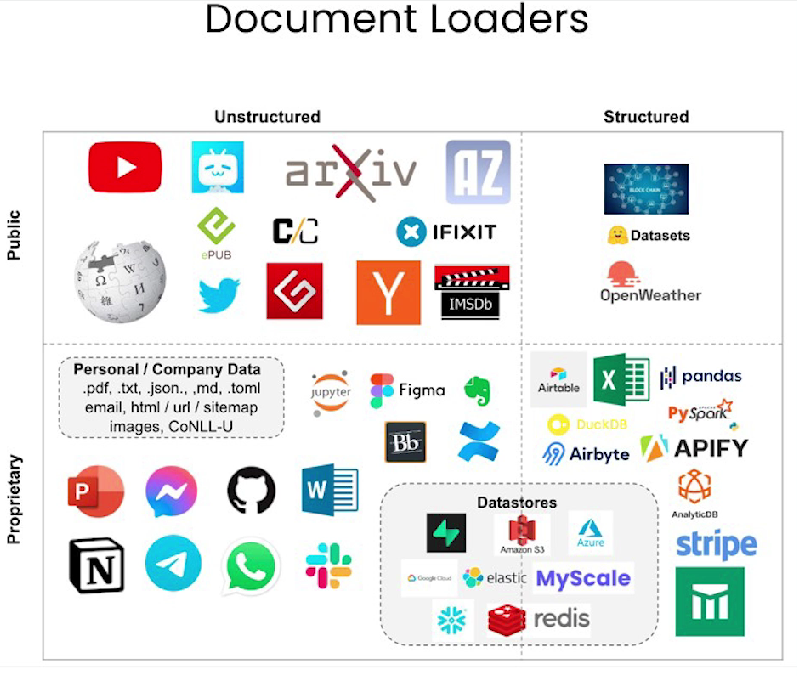